In [10]:
import pandas as pd 
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('../csvs/MD17_Force.csv')
df.head()

,MD17_molecules,SchNet,DimeNet,PhysNet,GemNet(Q),GemNet(T),PaiNN(F),PaiNN(F+E),ENINet,SpookyNet,NequIP(l=3),NewtonNet,SO3krates,sGDML,ViSNet
0,Aspirin,1.35,0.499,0.605,0.217,0.219,0.338,0.371,0.198,0.258,0.184,0.348,0.236,0.680,0.155
1,Benzene,0.31,0.187,x,0.145,0.145,x,x,0.169,x,x,x,x,0.409,x
2,Ethanol,0.39,0.230,0.16,0.088,0.085,0.224,0.23,0.100,0.094,0.071,0.264,0.096,0.330,0.06
3,Malonaldehyde,0.66,0.383,0.319,0.159,0.155,0.344,0.319,0.192,0.167,0.129,0.323,0.147,0.410,0.1
4,Naphthalene,0.58,0.215,0.31,0.051,0.055,0.077,0.083,0.046,0.089,0.039,0.084,0.074,0.110,0.039


In [12]:
label_colors = {
    'SchNet':      ['SchNet'         ,'#1f77b4'],  # muted blue
    'DimeNet':     ['DimeNet'        ,'#d62728'],  # safety orange
    'PhysNet':     ['PhysNet'        ,'#8c6d31'],  # cooked asparagus green
    'GemNet(Q)':   ['GemNet (Q)'     ,'#843c39'],  # brick red
    'GemNet(T)':   ['GemNet (T)'     ,'orange' ],  #
    'PaiNN(F)':    ['PaiNN (F)'      ,'#5254a3'],  # chestnut brown
    'PaiNN(F+E)':  ['PaiNN (F+E)'    ,'#7f7f7f'],  # raspberry yogurt pink
    'ENINet':      ['ENINet'         ,'#e377c2'],  # middle gray
    'SpookyNet':   ['SpookyNet'      ,'#bcbd22'],  # curry yellow-green
    'NequIP(l=0)': ['NequIP ($l=0$)' ,'#2ca02c'],  # blue-teal
    'NequIP(l=1)': ['NequIP ($l=1$)' ,'#393b79'],  # dark muted blue
    'NequIP(l=2)': ['NequIP ($l=2$)' ,'red'    ],  #
    'NequIP(l=3)': ['NequIP ($l=3$)' ,'#17becf'],  # dark mustard
    'MACE':        ['MACE'           ,'#ff7f0e'],  # dark brick red
    'NewtonNet':   ['NewtonNet'      ,'#7b4173'],  # dark purple
    'Allegro':     ['Allegro'        ,'#9467bd'],  # soft blue
    'SO3krates':   ['SO3krates'      ,'#6b6ecf'],  # soft purple
    'FCHL19':      ['FCHL19'         ,'#9c9ede'],  # light lavender
    'GAP(SOAP)':   ['GAP(SOAP)'      ,'#8ca252'],  # light olive green
    'sGDML':       ['sGDML'          ,'#b5cf6b'],  # pastel green
    'ACE':         ['ACE'            ,'violet' ], #
    'MGNN':        ['MGNN'           ,'black'  ], #
    'ViSNet':      ['ViSNet'         ,'cyan'   ], #
} 

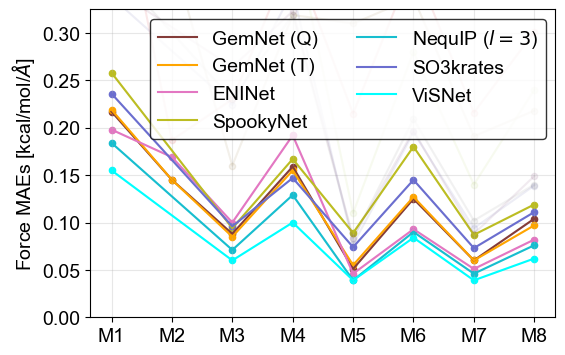

In [13]:
plt.rcParams.update({'font.size':14})
plt.rcParams['font.family']='Arial'
fig,ax = plt.subplots(figsize=(6,4))

x = [0,1,2,3,4,5,6,7]
mae_cutoff = 0.3 # kcal/mol/A


for i_col in range(1,len(df.columns)):

    column = df.iloc[:, i_col]        
    column_name = df.columns[i_col]   

    x_new = []
    y_new = []

    for i in range(len(x)):
        if column[i] != 'x': 
            x_new.append(x[i])
            y_new.append(float(column[i]))

    if all(y <= mae_cutoff for y in y_new):
        ax.plot(x_new,y_new,label=label_colors[column_name][0],color=label_colors[column_name][1],alpha=1)
        ax.scatter(x_new,y_new,color=label_colors[column_name][1],s=20)
    if any(y <= mae_cutoff for y in y_new):
        ax.plot(x_new,y_new,color=label_colors[column_name][1],alpha=0.1)
        ax.scatter(x_new,y_new,color=label_colors[column_name][1],s=20,alpha=0.1)


ax.set_ylim([0,mae_cutoff+0.025])

ax.set_xticks([0,1,2,3,4,5,6,7])
ax.set_xticklabels(['M1','M2','M3','M4','M5','M6','M7','M8'])

ax.set_ylabel('Force MAEs [kcal/mol/$\\AA$]')

ax.legend(edgecolor='black',facecolor='white',loc='upper right',ncol=2)
ax.grid(alpha=0.3)

plt.savefig('MD17_F.pdf',format='pdf',bbox_inches='tight')

plt.show()